# 5. 既存の分析結果に基づいた深堀分析

## 5.1 特定のカテゴリデータを抽出

### 5.1.1 データ読み込み

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import japanize_matplotlib
import matplotlib.ticker as mtick

In [2]:
# データ読み込み
df = pd.read_csv("../data/customer_shopping_data_2022.csv")

# 「invoice_date」を日付型に変換
df["invoice_date"] = pd.to_datetime(df["invoice_date"], errors="coerce")

### 5.1.2 「Clothing」「Shoes」「Technology」を抽出

In [3]:
# 特に売上が高いカテゴリのデータを抽出
df_filtered = df[df["category"].isin(["Clothing", "Shoes", "Technology"])]
# データ確認
df_filtered.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,total_amount,age_group
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-05-08,Kanyon,7502.00,20s
1,I227836,C657758,Female,28,Clothing,5,1500.40,Credit Card,2022-05-24,Forum Istanbul,7502.00,20s
6,I179802,C312861,Male,25,Clothing,2,600.16,Cash,2022-11-17,Cevahir AVM,1200.32,20s
7,I336189,C555402,Female,67,Clothing,2,600.16,Credit Card,2022-03-06,Kanyon,1200.32,60s
9,I823067,C322947,Male,52,Clothing,2,600.16,Credit Card,2022-06-18,Cevahir AVM,1200.32,50s


### 5.1.3 データ確認

In [4]:
# 抽出できているか確認
df_filtered["category"].unique()

array(['Clothing', 'Shoes', 'Technology'], dtype=object)

In [5]:
# データ構造確認
df_filtered.shape

(22467, 12)

## 5.2 カテゴリ別に年代別、性別で集計

### 5.2.1 年代ごとのカテゴリの売上高、取引件数を集計

In [10]:
# カテゴリ×年代で売上高と取引件数を集計
sales_by_age = df_filtered.groupby(["category", "age_group"])["total_amount"].sum().unstack()
count_by_age = df_filtered.groupby(["category", "age_group"])["invoice_no"].count().unstack()

In [12]:
# 確認
sales_by_age

age_group,10s,20s,30s,40s,50s,60s
category,,,,,,
Clothing,1946318.88,10137902.72,9707287.92,10154707.2,9891236.96,9916443.68
Shoes,1404397.80,5955486.91,5725021.63,6013703.4,6149941.99,5696213.47
Technology,788550.00,4889850.00,5527200.00,5554500.0,4748100.00,5142900.00


### 5.2.2 性別ごとのカテゴリの売上高、取引件数を集計

In [13]:
# カテゴリ×性別で売上高と取引件数を集計
sales_by_gender = df_filtered.groupby(["category", "gender"])["total_amount"].sum().unstack()
count_by_gender = df_filtered.groupby(["category", "gender"])["invoice_no"].count().unstack()

In [14]:
# データ確認
sales_by_gender

gender,Female,Male
category,,
Clothing,31157906.56,20595990.80
Shoes,18167746.07,12777019.13
Technology,16103850.00,10547250.00


## 5.3 グラフによる可視化・画像を保存

### 5.3.1 年代別データ

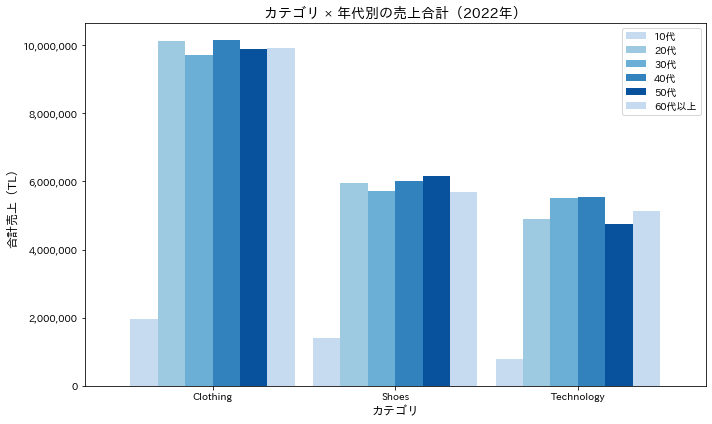

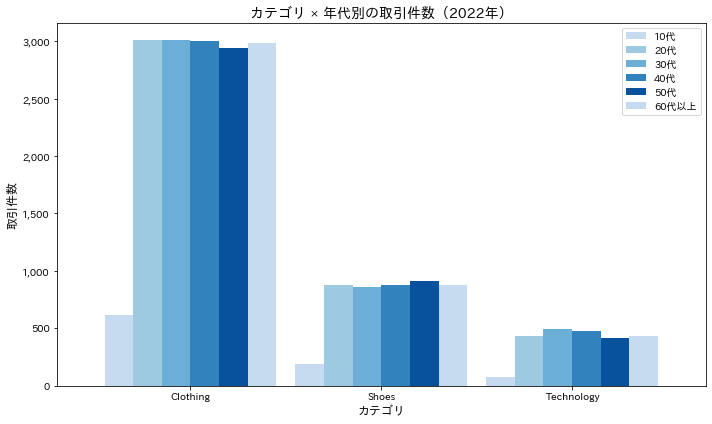

In [24]:
# グラフによる可視化

# 年代別
# 年代別カラー（5色）
age_colors = ["#c6dbef", "#9ecae1", "#6baed6", "#3182bd", "#08519c"]
figsize = (10, 6)
formatter = mtick.FuncFormatter(lambda x, _: f"{int(x):,}")

age_plots = [
    ("sales_by_age", "カテゴリ × 年代別の売上合計（2022年）", "age_sales"),
    ("count_by_age", "カテゴリ × 年代別の取引件数（2022年）", "age_count"),
]

for i, (var_name, title, filename) in enumerate(age_plots, start=16):
    df_plot = eval(var_name)

    fig, ax = plt.subplots(figsize=figsize, facecolor="white")
    df_plot.columns = ["10代", "20代", "30代", "40代", "50代", "60代以上"]
    df_plot.plot(kind="bar", ax=ax, color=age_colors, width=0.9)

    ax.set_title(title, fontsize=14)
    ax.set_xlabel("カテゴリ", fontsize=12)
    ax.set_ylabel("合計売上（TL）" if "sales" in filename else "取引件数", fontsize=12)
    ax.yaxis.set_major_formatter(formatter)
    ax.tick_params(axis="x", rotation=0)

    plt.tight_layout()
    plt.show()

    fig.savefig(f"../output/{i:02d}_{filename}.png", dpi=300, bbox_inches="tight")

### 5.3.2 性別データ

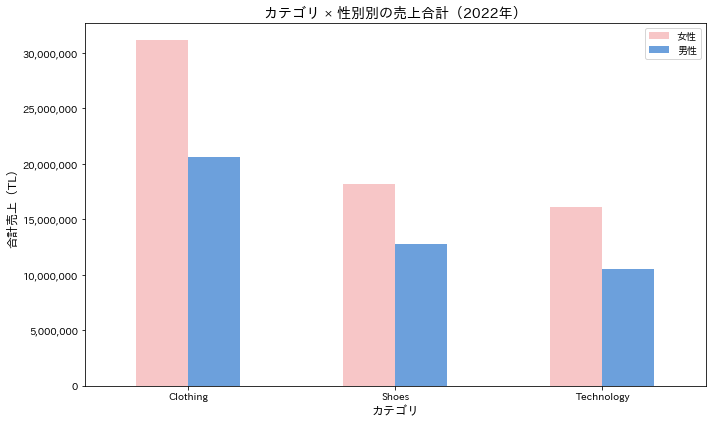

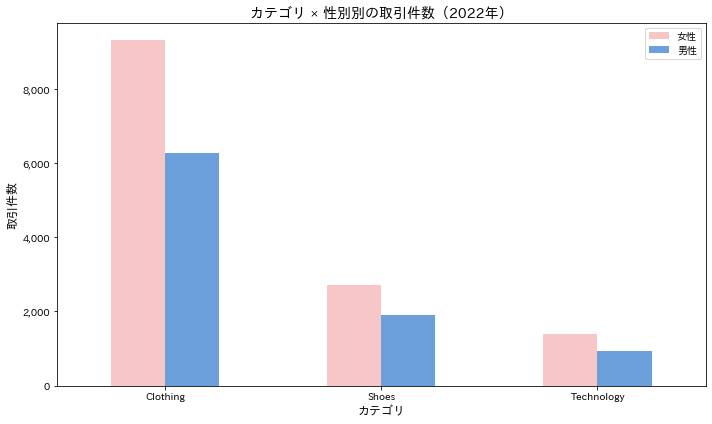

In [25]:
# 性別
gender_colors = ["#f7c6c7", "#6ca0dc"]

gender_plots = [
    ("sales_by_gender", "カテゴリ × 性別別の売上合計（2022年）", "gender_sales"),
    ("count_by_gender", "カテゴリ × 性別別の取引件数（2022年）", "gender_count"),
]

for i, (var_name, title, filename) in enumerate(gender_plots, start=18):
    df_plot = eval(var_name)

    fig, ax = plt.subplots(figsize=figsize, facecolor="white")
    df_plot.columns = ["女性", "男性"]
    df_plot.plot(kind="bar", ax=ax, color=gender_colors)

    ax.set_title(title, fontsize=14)
    ax.set_xlabel("カテゴリ", fontsize=12)
    ax.set_ylabel("合計売上（TL）" if "sales" in filename else "取引件数", fontsize=12)
    ax.yaxis.set_major_formatter(formatter)
    ax.tick_params(axis="x", rotation=0)

    plt.tight_layout()
    plt.show()

    fig.savefig(f"../output/{i:02d}_{filename}.png", dpi=300, bbox_inches="tight")

## 売上上位カテゴリに対する属性別深掘り分析（2022年）

これまで、性別・年代・決済方法・モール・カテゴリ・時間軸など、さまざまな因子に基づく可視化・分析を実施してきた。  
その結果、特に「カテゴリ」「モール」「性別」「年齢」といった変数において、明確な売上の偏りが見られる傾向が確認された。　
また、「決済方法」にも偏りは存在したが、単なる選択肢のシェアの分布であると判断し、深堀り分析の対象からは除外した。

モールに関しては、すでにカテゴリ別とのクロス集計を行った結果、売上上位のモールは特定カテゴリ（Clothing・Shoes・Technology）に売上が集中していることが影響していると判断された。  
そこで今回は、これら3つのカテゴリに対象を絞り、**性別・年代と掛け合わせた深掘り分析**を実施することとした。

### 考察メモ
分析の結果、**一次元分析で把握していた傾向がカテゴリ単位でも一貫して確認される**という結果となった。  
具体的には以下の通りである：

- **年代別**：どのカテゴリにおいても、20代以上の購買が顕著に多く、その中での年代別の大きな差は見られなかった
- **性別別**：いずれのカテゴリでも女性の購買が男性を上回っており、特にClothingカテゴリではその差が顕著である。

これらの結果は、今後のマーケティング施策や販促戦略のターゲティングにおいて、カテゴリごとに属性を明確に意識すべきことを示唆している。

### 保存ファイル
- グラフ画像は`output/`ディレクトリにそれぞれ保存済み